**Exercise 2a/b**

In [3]:
house = {
    "living": {
        "exits": {"north": "kitchen", "outside": "garden", "upstairs": "bedroom"},
        "people": ["James"],
        "capacity": 2,
    },
    "kitchen": {"exits": {"south": "living"}, "people": [], "capacity": 1},
    "garden": {"exits": {"inside": "living"}, "people": ["Sue"], "capacity": 3},
    "bedroom": {
        "exits": {"downstairs": "living", "jump": "garden"},
        "people": [],
        "capacity": 1,
    },
}

**Answer 2a**

We can get a simpler dictionary with just capacities like this:

In [105]:
{name: room['capacity'] for name, room in house.items()}

{'living': 2, 'kitchen': 1, 'garden': 3, 'bedroom': 1}

**Answer 2b**

To get the current number of occupants, we can use a similar dictionary comprehension. Remember that we can *filter* (only keep certain rooms) by adding an `if` clause:

In [106]:
{name: len(room["people"]) for name, room in house.items() if len(room["people"]) > 0}

{'living': 1, 'garden': 1}

**Answer 2c**

Things to 'notice' here: 

1.99999 doesn't round, even if you did ```int(1.9999999)``` you would get 1.

Strings aren't integers

Even though 20 and 5 are integers and they divide to give 4, the result is a float, not an int

'10.' is a float not an integer

Can do this in one line using comprehension or could make an empty list and append to it.

In [7]:
def example_funct(*args):
    op = [a for a in args if type(a)== int and a%2 == 0]
    return op

example_funct(1, 1.99999999999, "three", 20/5, 5, 6, "sju", "atte", 9, 10., 11, 12)

[6, 12]

**Answer 2d**

Will have to import libraries.

Can use ```dir(X)``` to list the attributes of the modules

There will be some depreciation warnings from scipy instructing users to go use numpy or numpy.lib (which can also be investigated via ```dir(np.lib)``` 

Statistics will return the mean as an integer whereas numpy and scipy will return a float.

All return the same value of pi.

scipy returns a complex number for the negative log example with an imaginary part of pi.

log(+ive) using +12.01 as an example

log(-ive) using -11.99 as an example

| Module | pi| log(+ive) | log(-ive)| mean|
| :-------|:-------------:|:-----:|:-----:|:-----:|
|numpy|3.14159...|2.48573...|nan|5.0|
|scipy|3.14159...|2.48573...|(2.48407... + 3.14159...j)|5.0|
|math|3.14159...|2.48573...|math domain error|§|
|statistics|§|2.48573...|math domain error|5|

§ module doesn't have method

**Answer 2f**

Something along the lines of this for the original question:

In [42]:
import requests
import IPython

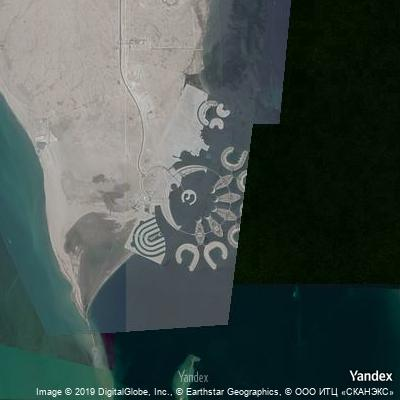

In [110]:
coordinates_as_lat_lon = [(36.2110,-115.2669),
                          (53.0066, 7.1920),
                          (41.3908, 2.1631),
                          (40.7822, -73.9653),
                          (25.8380, 50.6050)]

def op_response(lat, lon):
    response = requests.get(
    "https://static-maps.yandex.ru:443/1.x",
        params={
            "size": "400,400",  # size of map
            "ll": str(lon) + "," + str(lat),  # longitude & latitude of centre
            "z": 12,  # zoom level
            "l": "sat",  # map layer (satellite image)
            "lang": "en_US",  # language
            },
        )
    return response.content

    
op = op_response(*coordinates_as_lat_lon[4])

IPython.core.display.Image(op)

**Answer 2e**

In [103]:
def extended_op_response(lat, lon, zoom=15, opfname="tmp.png"):#, opfname: None):

    response = requests.get(
    "https://static-maps.yandex.ru:443/1.x",
        params={
            "size": "400,400",  # size of map
            "ll": str(lon) + "," + str(lat),  # longitude & latitude of centre
            "z": zoom,  # zoom level
            "l": "sat",  # map layer (satellite image)
            "lang": "en_US",  # language
            },
        )
        
    with open(opfname, "wb") as png:
        png.write(response.content)


extended_op_response(*coordinates_as_lat_lon[1], zoom=16, opfname="map_picture_1.png")
